<a href="https://colab.research.google.com/github/digvijaynalavade/Analysis-/blob/main/project_Idian_company_registrer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

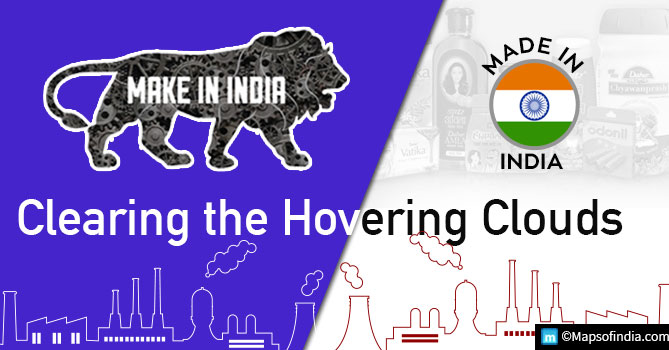

# Import usefull libreary for data cleaning and vesualisation


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import data


In [ ]:
register_compny = pd.read_csv('/content/drive/MyDrive/csv /register_compny.zip',parse_dates=['DATE_OF_REGISTRATION'])


Create the copy of dataset to dosnot affect main data

In [ ]:
df = register_compny.copy()

About data

In [ ]:
# number of row and columns in data
df.shape

In [ ]:
# stetastic of data
df.describe(include='all')

In [ ]:
# abot data like data type and numbe of entries
df.info()

In [ ]:
# columns name of the data
df.columns

# Data cleaning

In [ ]:
# find null values column wise
df.isnull().sum(axis=0).sort_values(ascending=False)        


In [ ]:
# find null values row wise
df.isnull().sum(axis=1).sort_values(ascending=False)      
  

persentgae of data missing

In [ ]:
# missing values percentage in column wise
percentage = round(df.isnull().sum(axis=0).sort_values(ascending=False)/len(register_compny)*100,2)
percentage

In [ ]:
# missing values percentage in row wise
df.isnull().sum(axis=1).sort_values(ascending=False)/15*100


Fill missing vslues 

In [ ]:
# REGISTRAR_OF_COMPANIES 
''' find the maxmimum occurance value '''

df['REGISTRAR_OF_COMPANIES'].value_counts().head(1)

In [ ]:
# fill na valus 
df['REGISTRAR_OF_COMPANIES'] = df['REGISTRAR_OF_COMPANIES'].fillna('ROC DELHI')

In [ ]:
# COMPANY_CLASS
''' find the maxmimum occurance value '''

null_fill = df['COMPANY_CLASS'].value_counts().head(1)

In [ ]:
# fill na valus 
df['COMPANY_CLASS'] = df['COMPANY_CLASS'].fillna('Private')

In [ ]:
# COMPANY_SUB_CATEGORY

null_fill = df['COMPANY_SUB_CATEGORY'].value_counts().head()
null_fill


In [ ]:
df['COMPANY_SUB_CATEGORY'] = df['COMPANY_SUB_CATEGORY'].fillna('Private')

In [ ]:
# INDUSTRIAL_CLASS  

null_fill = df['INDUSTRIAL_CLASS'].value_counts().head(1)
null_fill


In [ ]:
# fill na valus
df['INDUSTRIAL_CLASS'] = df['INDUSTRIAL_CLASS'].fillna(74999.0)

In [ ]:
# COMPANY_CATEGORY  

null_fill = df['COMPANY_CATEGORY'].value_counts().head(1)
null_fill


In [ ]:
# fill na values
df['COMPANY_CATEGORY'] = df['COMPANY_CATEGORY'].fillna('Company limited by Shares')

In [ ]:
# PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN

null_fill = df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts()
null_fill


In [ ]:
# fill na values
df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] = df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].fillna('Real estate renting and business activities ')

In [ ]:
# according to google the year of tata coffee limited date of registretion is correct
df[df['COMPANY_NAME'].str.contains('TATA COFFEE LIMITED')]

In [ ]:
df['DATE_OF_REGISTRATION'].sort_values(ascending=False)

In [ ]:
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors = 'coerce')

In [ ]:
# add a new column to extact DATE_OF_REGISTRATION into year
df['year']= (pd.DatetimeIndex(df['DATE_OF_REGISTRATION']).year)

to check yaer info

In [ ]:
# unique year
df['year'].unique()

In [ ]:
# minimum year
print(f'first register year of company = {df.year.min()}')

print(f'last register year of company ={df.year.max()}')

In [ ]:
# year
null_fill = df['year'].value_counts().head(1)
null_fill


In [ ]:
# fill null values
df['year'] = df['year'].fillna(2019.0)

inspect data again missing values


In [ ]:
# Check duplicate values are present in data
df.isnull().sum(axis=0).sort_values(ascending=False)

In [ ]:
# drop un usefull columns
df.drop(['EMAIL_ADDR','REGISTERED_OFFICE_ADDRESS'],axis=1,inplace=True)

In [ ]:
df.isnull().sum(axis=1).sort_values(ascending=False) 

# Exploretery data analysis (EDA)


* 
STATE OF INDIA WHERE INDUSTRY ARE PRESENT ?

In [ ]:
from matplotlib.cbook import print_cycles
print('state of india where industry are present :')
print_cycles(list(df['REGISTERED_STATE'].unique()))

print("\n")
print(f'number of stete where industry present :')
print(df['REGISTERED_STATE'].nunique())

* 
INDIAS FIRST REGISTERED COMPANY NAME ?

In [ ]:
df.sort_values(by='DATE_OF_REGISTRATION',ascending=True).head(1)
# indias first compy is "JHUNJHUNU COMMERCIAL COMPANY LIMITED"
# indias first register compny in "1857/03/25"
# register state "Rajasthan"
# business prinipel "Real estate renting and business activities"
# commpny satus is "STOF"

* BIG CAPITAL COMPANY OF INDIA


In [ ]:
df.nlargest(1,'AUTHORIZED_CAP')
# maxmimum authorised capital compny is "JIO PLATFORMS LIMITED"
# ragister date is "2019-11-15"
# ragister state is "Gujarat"
# authorised capital amount is "1.850000e+12"
# compny status is "ACTV"
# buisness principle is "Real estate renting and business activities"

*
MUBAI IS THE FINASHIAL CAPITAL OF INDIA SO MAUMBAI IN MAHARASTRA STATE SO FIRST REGISTER COMPNY OF MAHARASTRA

In [ ]:
Maharashtra = df[df['REGISTERED_STATE'].str.contains("Maharashtra")]
Maharashtra.sort_values(by='DATE_OF_REGISTRATION',ascending=True).head(1)
# "BOMBAY BURMAH TRADING CORPORATIONLIMITED" is first maharastra register comapny
# the compny status is "ACTV" and it is idias first active old compny
# ragistration date is "1863-04-09"
# autorised caapital is "150000000.0"

*  WHICH STATE HAVE MAXIMUM NUMBER OF INDUSRTY WAS PRESENT ?

In [ ]:
Top_industrial_state = df.groupby('REGISTERED_STATE')['REGISTERED_STATE'].count().sort_values(ascending=False)
Top_industrial_state_10 = df.groupby('REGISTERED_STATE')['REGISTERED_STATE'].count().sort_values(ascending=False).head(10)
Top_industrial_state_10

* 
COMPANY STATUS AND THAIR COUNT


In [ ]:
COMPANY_STATUS = df.groupby('COMPANY_STATUS')['COMPANY_STATUS'].count().sort_values(ascending=False)
COMPANY_STATUS

* YEAR AND NUMBER OF COMPANYS WAS REGISTERED IN THIS YAER

In [ ]:
year_and_number_of_companys_ragister = df.groupby('year')['year'].count().sort_values(ascending=False)
top_5year_and_number_of_companys_ragister = df.groupby('year')['year'].count().sort_values(ascending=False).head()
year_and_number_of_companys_ragister

* COMPANY CLASS AND THAIR VALUE COUNT


In [ ]:
COMPANY_CLASS_VALUE_COUNT = df.groupby('COMPANY_CLASS')['COMPANY_CLASS'].count().sort_values(ascending=False)
COMPANY_CLASS_VALUE_COUNT

In [ ]:
df.columns

#visualisation


Top 10 industrial state

In [ ]:
Top_industrial_state_10.plot(kind='bar',color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('Top 10 industrial state of india')
plt.ylabel('Number of companys')
plt.xlabel('State')
plt.rcParams['figure.figsize'] = (10, 5)

Year and number of companys register on this year

In [ ]:
year_and_number_of_companys_ragister.plot()
plt.title('Year and number of register companys on this year')
plt.ylabel('Year')
plt.xlabel('Number of companys ragister')
plt.rcParams['figure.figsize'] = (11, 5)

company class

In [ ]:
COMPANY_CLASS_VALUE_COUNT.plot(kind='bar')
plt.xticks(rotation=360)

Company status and thir count

In [ ]:
COMPANY_STATUS.plot()

plt.show()

# ACCENTURE

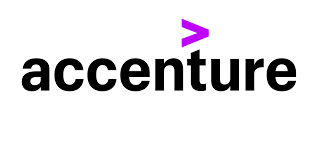

In [ ]:
ACCENTURE = df[df['COMPANY_NAME'].str.contains("ACCENTURE")]
ACCENTURE

In [ ]:
ACCENTURE.groupby("PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN")['COMPANY_NAME'].count()